# Feature study and extract aggregate statistics

#### Import necessary modules

In [1]:
import os
import pandas as pd

from rank_and_position_dfs import get_ranked_df, get_ranked_pos_df 
from graphs import rank_order, plot_avg_value, plot_avg_value_per_position

### Make folder paths for data (and potentially a new subfolder)

In [2]:
def make_new_folder(folder):
    ## Check whether the specified path exists or not
    isExist = os.path.exists(folder)
    
    if not isExist:
        ## Create a new directory because it does not exist 
        os.makedirs(folder)
        print("The new directory is created!")

In [3]:
data_path = f'data/'
plot_path = f'plots/'
agg_stats_path = f'agg_stats/'

make_new_folder(data_path)
make_new_folder(plot_path)
make_new_folder(agg_stats_path)

## Get Aggregate Statistics by rank (and position)

#### Group by rank

In [4]:
df = pd.read_csv(f'{data_path}cleaned_total_list.csv')

ranked_df = get_ranked_df(df)

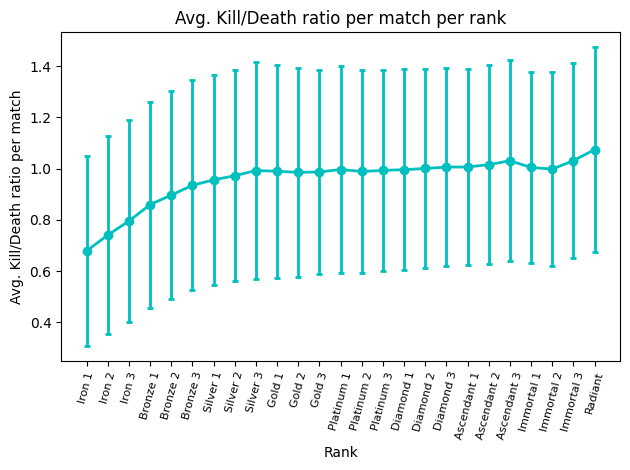

In [5]:
plot_avg_value('KD', ranked_df, plot_path, 'Avg. Kill/Death ratio per match')

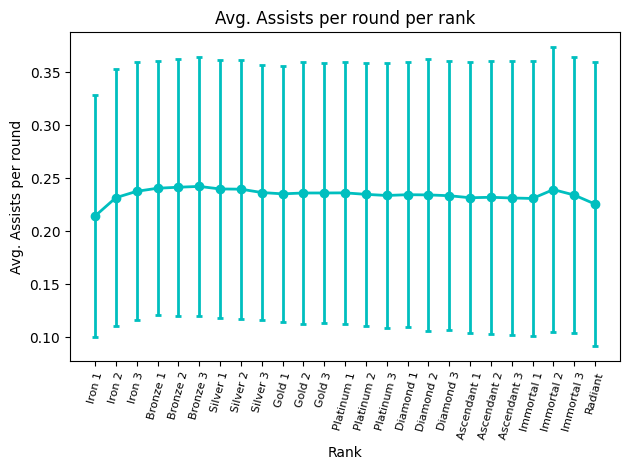

In [6]:
plot_avg_value('avg_assists', ranked_df, plot_path, 'Avg. Assists per round')

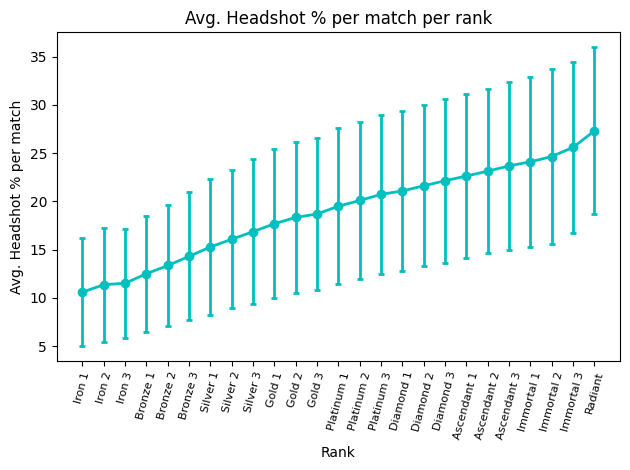

In [7]:
plot_avg_value('HS_perc', ranked_df, plot_path, 'Avg. Headshot % per match')

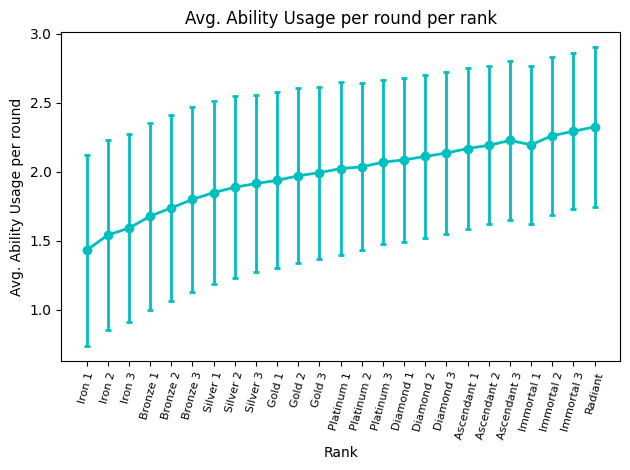

In [8]:
plot_avg_value('avg_ability_usage', ranked_df, plot_path, 'Avg. Ability Usage per round')

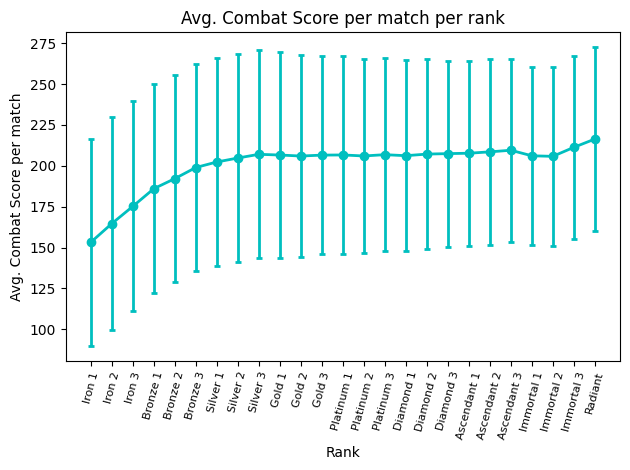

In [9]:
plot_avg_value('avg_score', ranked_df, plot_path, 'Avg. Combat Score per match')

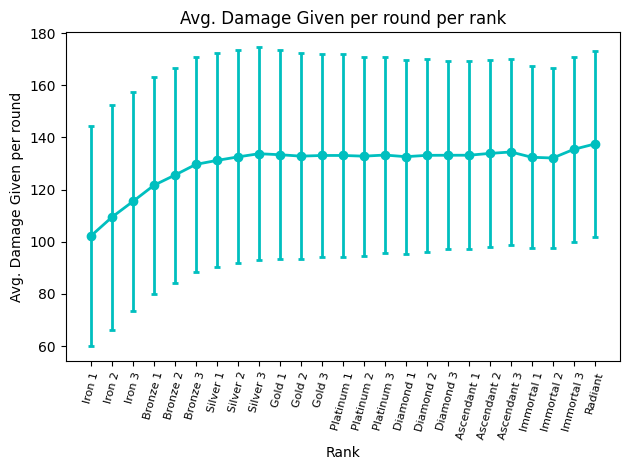

In [10]:
plot_avg_value('avg_dmg_made', ranked_df, plot_path, 'Avg. Damage Given per round')

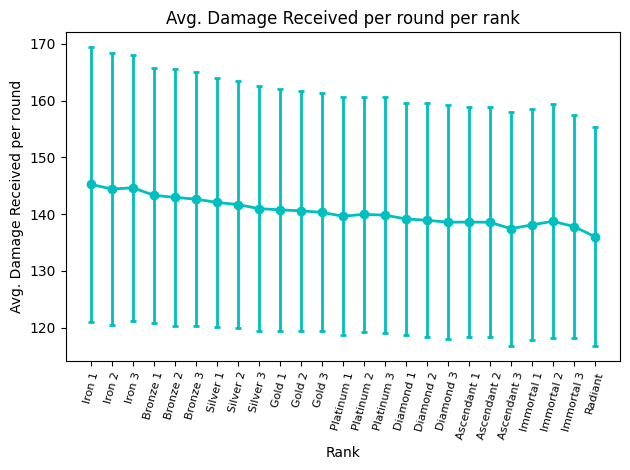

In [11]:
plot_avg_value('avg_dmg_rec', ranked_df, plot_path, 'Avg. Damage Received per round')

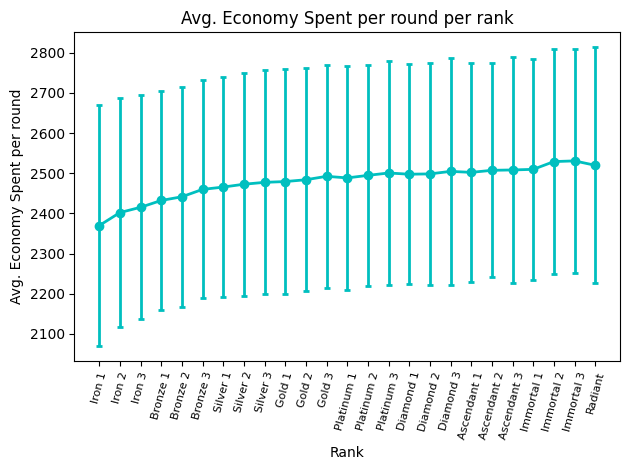

In [12]:
plot_avg_value('avg_spent', ranked_df, plot_path, 'Avg. Economy Spent per round')

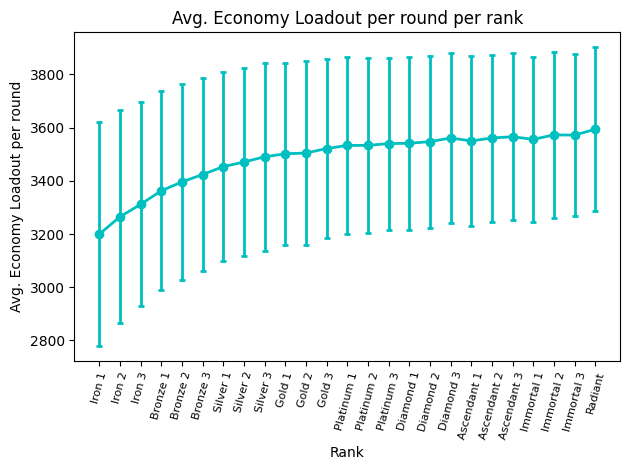

In [13]:
plot_avg_value('avg_loadout', ranked_df, plot_path, 'Avg. Economy Loadout per round')

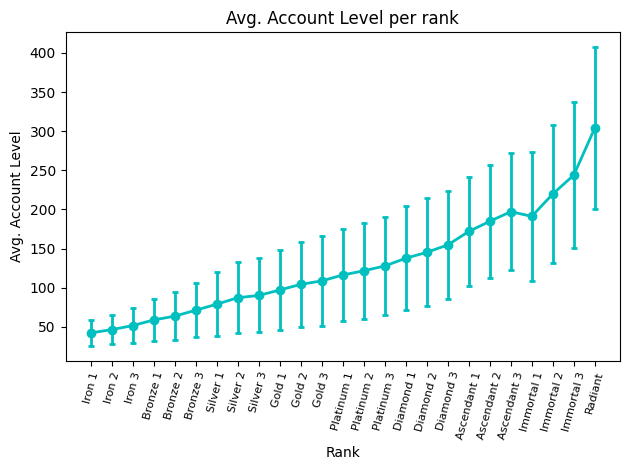

In [14]:
plot_avg_value('level', ranked_df, plot_path, 'Avg. Account Level')

#### Also group by position

In [15]:
df = pd.read_csv(f'{data_path}cleaned_total_list.csv')

ranked_pos_df = get_ranked_pos_df(df)

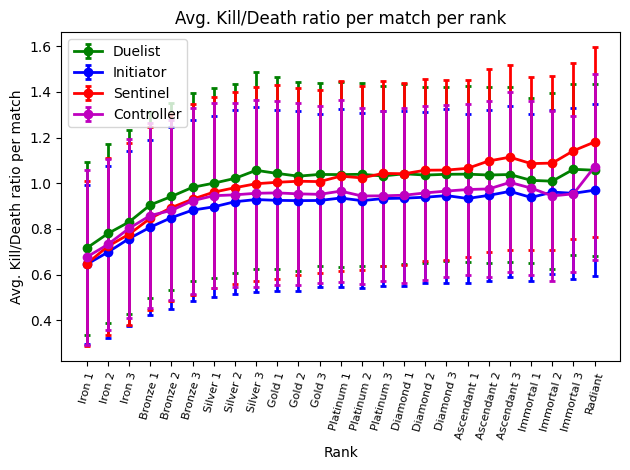

In [16]:
plot_avg_value_per_position('KD', ranked_pos_df, plot_path, 'Avg. Kill/Death ratio per match')

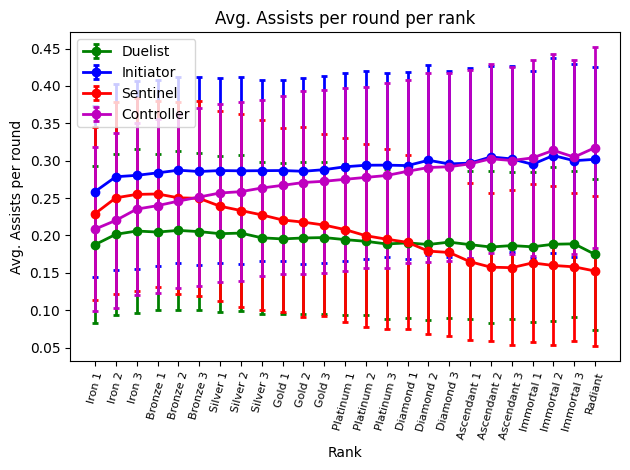

In [17]:
plot_avg_value_per_position('avg_assists', ranked_pos_df, plot_path, 'Avg. Assists per round')

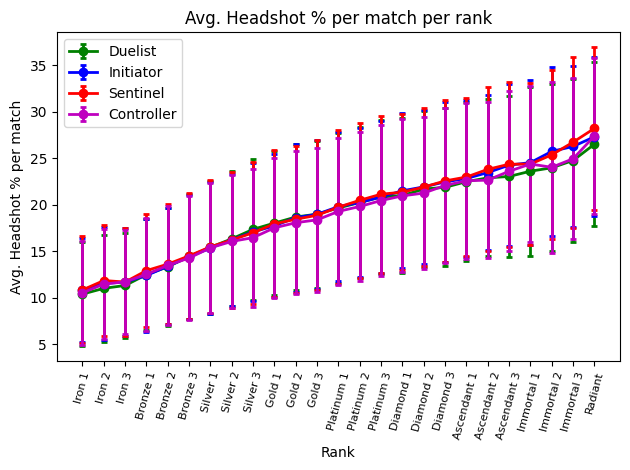

In [18]:
plot_avg_value_per_position('HS_perc', ranked_pos_df, plot_path, 'Avg. Headshot % per match')

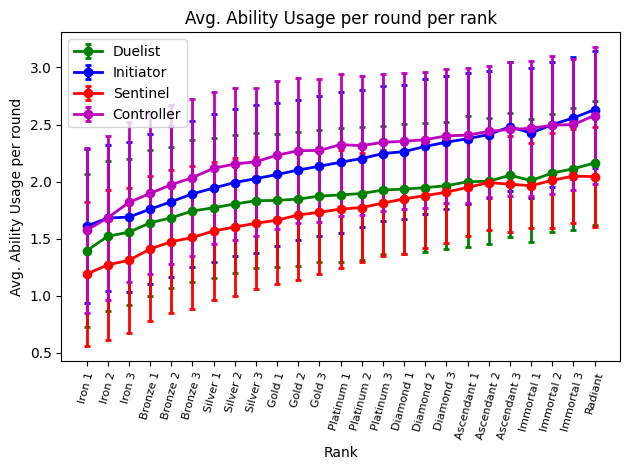

In [19]:
plot_avg_value_per_position('avg_ability_usage', ranked_pos_df, plot_path, 'Avg. Ability Usage per round')

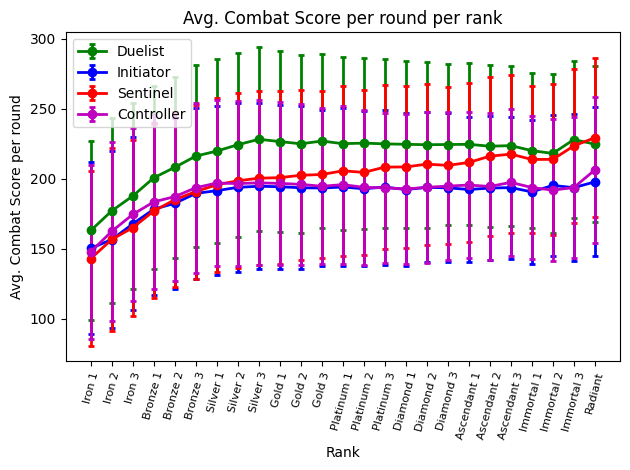

In [20]:
plot_avg_value_per_position('avg_score', ranked_pos_df, plot_path, 'Avg. Combat Score per round')

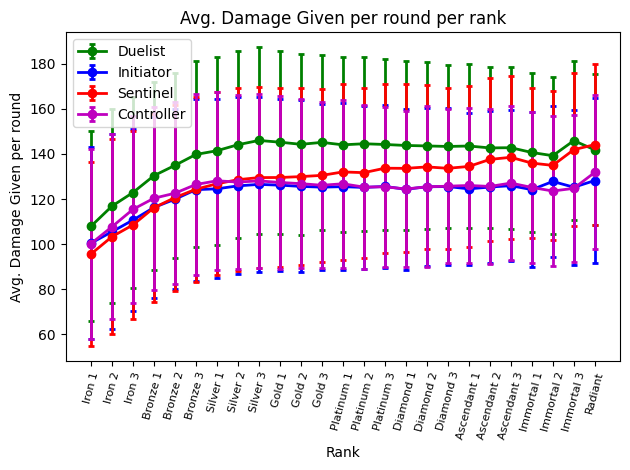

In [21]:
plot_avg_value_per_position('avg_dmg_made', ranked_pos_df, plot_path, 'Avg. Damage Given per round')

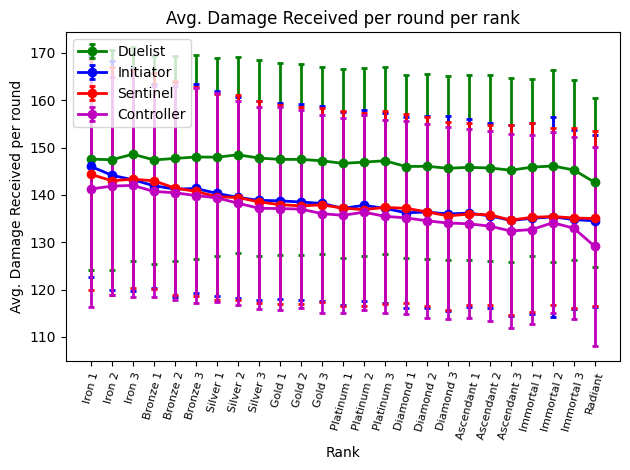

In [22]:
plot_avg_value_per_position('avg_dmg_rec', ranked_pos_df, plot_path, 'Avg. Damage Received per round')

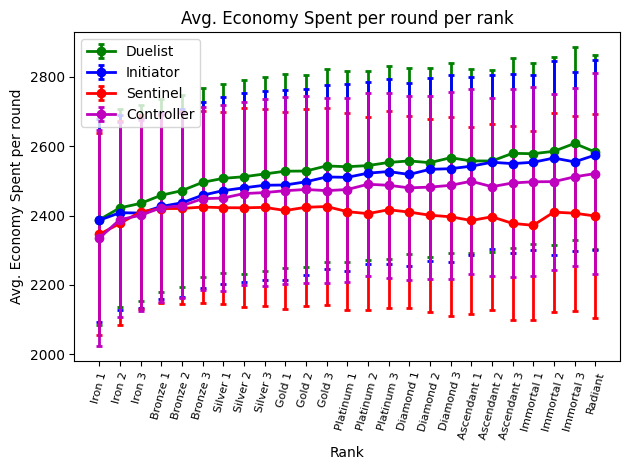

In [23]:
plot_avg_value_per_position('avg_spent', ranked_pos_df, plot_path, 'Avg. Economy Spent per round')

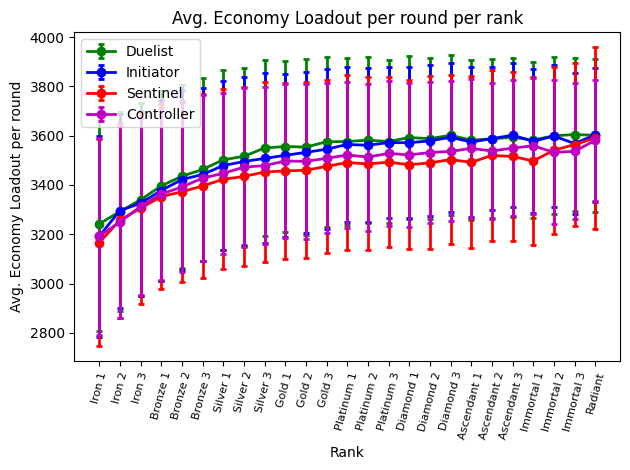

In [24]:
plot_avg_value_per_position('avg_loadout', ranked_pos_df, plot_path, 'Avg. Economy Loadout per round')

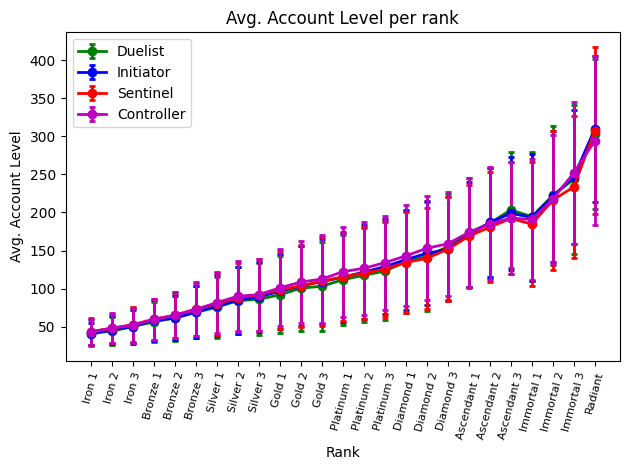

In [25]:
plot_avg_value_per_position('level', ranked_pos_df, plot_path, 'Avg. Account Level')

## Export model numbers

In [26]:
for agg_stat in ranked_df:
    df = ranked_df[agg_stat]
    df['Rank'] = rank_order()
    cols = list(df.columns.values)
    df = df[[cols[-1]] + cols[0:(len(cols) - 1)]]
    
    df.to_csv(f'{agg_stats_path}rank_{agg_stat}.csv', index=False)

In [27]:
for position in ranked_pos_df:
    for agg_stat in ranked_pos_df[position]:
        df = ranked_pos_df[position][agg_stat]
        df['Rank'] = rank_order()
        cols = list(df.columns.values)
        df = df[[cols[-1]] + cols[0:(len(cols) - 1)]]
        
        df.to_csv(f'{agg_stats_path}rank_{position}_{agg_stat}.csv', index=False)